<a href="https://colab.research.google.com/github/FabianaDutra/DataChallengeALURA/blob/main/ALURA_DATA_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>ALURA Challenge - Data Science</b>
CHURN DE CLIENTES

## Imports  <i>(Importando bibliotecas)</i>

In [1271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

## Sets

In [1272]:
sns.set( rc = {'figure.figsize' : ( 10,5), 'axes.labelsize' : 10 }) 

# <b> SEMANA 01 - Preparação os dados</i></b>

### <i>  Dicionário de Dados </i>

Data Dictionary <i>(Dicionário de Dados)</i>

   - customerID: número de identificação único de cada cliente
    - Churn: se o cliente deixou ou não a empresa
    - gender: gênero (masculino e feminino)
    - SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    - Partner: se o cliente possui ou não um parceiro ou parceira
    - Dependents: se o cliente possui ou não dependentes tenure: meses de contrato do cliente
     -tenure: meses de contrato do cliente
    - PhoneService: assinatura de serviço telefônico
    - MultipleLines: assisnatura de mais de uma linha de telefone
    - InternetService: assinatura de um provedor internet
    - OnlineSecurity: assinatura adicional de segurança online
    - OnlineBackup: assinatura adicional de backup online
    - DeviceProtection: assinatura adicional de proteção no dispositivo
    - TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    - StreamingTV: assinatura de TV a cabo
    - StreamingMovies: assinatura de streaming de filmes
    - Contract: tipo de contrato
    - PaperlessBilling: se o cliente prefere receber online a fatura
    - PaymentMethod: forma de pagamento
    - Charges.Monthly: total de todos os serviços do cliente por mês
    - Charges.Total: total gasto pelo cliente

In [1273]:
# Sexo : Masculino = 0 e Feminino = 1
dic_Sexo = {"Male":0, "Female":1}

In [1274]:
# Senioridade: se o cliente tem MENOS de 65 anos = 0 e MAIS de 65 anos = 1
dic_senior = {"MENOS_65": 0, "MAIS_65": 1}

### <i>Lendo dados JSON  do Github</i>

In [1275]:
df_json = pd.read_json(
                  path_or_buf = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json"                
                  )
df_json.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### <i>  Organizando o DataFrame</i>

In [1276]:
df_customer_5 = pd.json_normalize(data = df_json.customer)
df_customer_5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [1277]:
df_phone_2 = pd.json_normalize(data = df_json.phone)
df_phone_2.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [1278]:
df_internet_7 = pd.json_normalize(data = df_json.internet)
df_internet_7.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [1279]:
df_account_5 = pd.json_normalize(data = df_json.account)
df_account_5.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [1280]:
df = pd.concat([df_json["customerID"], df_json["Churn"], df_customer_5,df_phone_2,df_internet_7,df_account_5],axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [1281]:
print("DataFrame com:", df.shape[0], "linhas e :", df.shape[1],"colunas")

DataFrame com: 7267 linhas e : 21 colunas


In [1282]:
df.to_csv("Telco-Customer-Churn_sem_tratamento.csv", index=False)

### <i> Avaliando os Dados</i>

In [1283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [1284]:
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

#### custumerID

In [1285]:
df["customerID"].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

Número de identificação único de cada cliente
Dtype: object(string)

#### Churn

In [1286]:
df["Churn"].unique() 

array(['No', 'Yes', ''], dtype=object)

In [1287]:
df["Churn"].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [1288]:
Perc_dados_inc_churn = (len(df[(df["Churn"] == "")]) / len(df))*100
Perc_churn_positivos = (len(df[(df["Churn"] == "Yes")]) / len(df))*100
Perc_churn_negativo = (len(df[(df["Churn"] == "No")]) / len(df))*100
print ("[CHURN] Percentual de dados Inconsistentes = {:.2f}%".format(Perc_dados_inc_churn))
print ("[CHURN] Percentual de CHURN Positivo = {:.2f}%".format(Perc_churn_positivos))
print ("[CHURN] Percentual de CHURN Negativo = {:.2f}%".format(Perc_churn_negativo))

[CHURN] Percentual de dados Inconsistentes = 3.08%
[CHURN] Percentual de CHURN Positivo = 25.72%
[CHURN] Percentual de CHURN Negativo = 71.20%


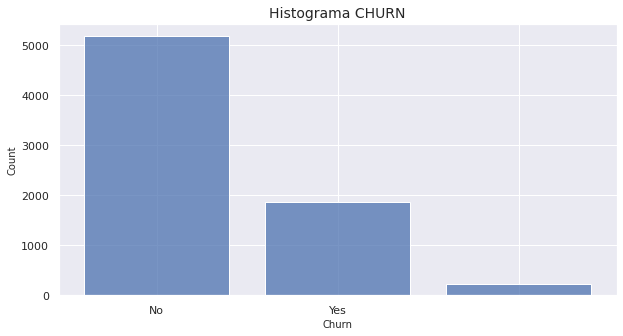

In [1289]:
ax = sns.histplot(df["Churn"] ,shrink=.8)
ax.axes.set_title('Histograma CHURN', fontsize = 14)
plt.show()

OBS:  Indica se o cliente deixou ou não a empresa. Registro com valores: "Yes" , "No", e também alguns valores vazios. Dtype: Object(

#### gender

In [1290]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [1291]:
Perc_feminino = (len(df[(df["gender"] == "Female")]) / len(df))*100
Perc_masculino = (len(df[(df["gender"] == "Male")]) / len(df))*100
print ("[GENERO] Percentual Feminino = {:.2f}%".format(Perc_feminino))
print ("[GENERO] Percentual Masculino = {:.2f}%".format(Perc_masculino))

[GENERO] Percentual Feminino = 49.43%
[GENERO] Percentual Masculino = 50.57%


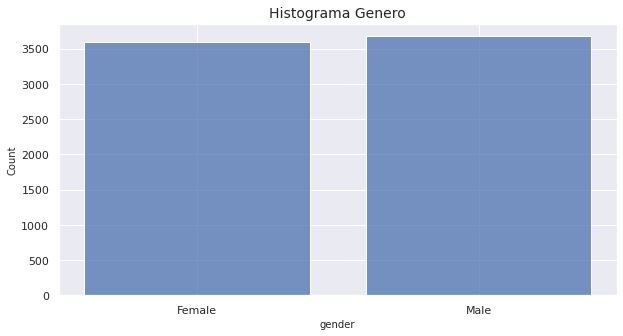

In [1292]:
ax = sns.histplot(df["gender"] ,shrink=.8)
ax.axes.set_title('Histograma Genero', fontsize = 14)
plt.show()

OBS: Indica o gênero do cliente (masculino e feminino). Dtype: Object. Dados distribuidos igualmente entre os dois gêneros

####SeniorCitizen

In [1293]:
df["SeniorCitizen"].unique()

array([0, 1])

In [1294]:
Perc_menor_65 = (len(df[(df["SeniorCitizen"] == 0)]) / len(df))*100
Perc_maior_65 = (len(df[(df["SeniorCitizen"] == 1)]) / len(df))*100
print ("[SENIORIDADE] Percentual Menor 65 anos = {:.2f}%".format(Perc_menor_65))
print ("[SENIORIDADE] Percentual Maior 65 anos = {:.2f}%".format(Perc_maior_65))

[SENIORIDADE] Percentual Menor 65 anos = 83.73%
[SENIORIDADE] Percentual Maior 65 anos = 16.27%


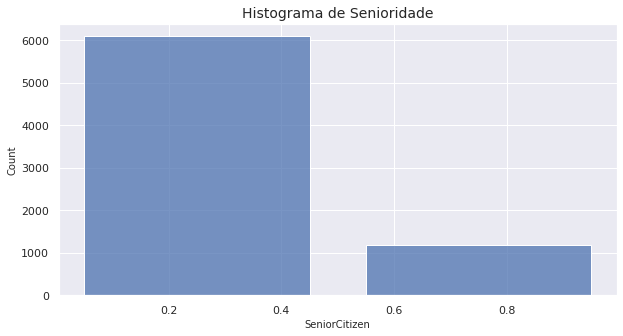

In [1295]:
ax = sns.histplot(df["SeniorCitizen"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Senioridade', fontsize = 14)
plt.show()

OBS: informação sobre um cliente ter ou não idade igual ou maior que 65 anos.
Diferente de outros items, aqui os valores não estão marcados como Yes/No, mas como 0 e 1, já preparados para processamento. Dtype:Int. Distribuição de dados com mais clientes na faixa menor que 65 anos

#### Partner

In [1296]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [1297]:
Perc_parceiro_nao = (len(df[(df["Partner"] == "No")]) / len(df))*100
Perc_parceiro_sim = (len(df[(df["Partner"] == "Yes")]) / len(df))*100
print ("[COMPANHEIRO] Percentual possuem parceiro = {:.2f}%".format(Perc_parceiro_sim))
print ("[COMPANHEIRO] Percentual não possuem parceiro = {:.2f}%".format(Perc_parceiro_nao))

[COMPANHEIRO] Percentual possuem parceiro = 48.41%
[COMPANHEIRO] Percentual não possuem parceiro = 51.59%


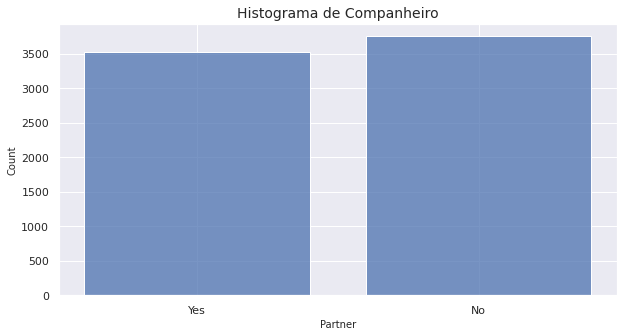

In [1298]:
ax = sns.histplot(df["Partner"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Companheiro', fontsize = 14)
plt.show()

OBS: Indica se o cliente possui ou não um parceiro. Dtype: object.
Dados distribuidos de maneira igualitária entre as duas classes.

#### Dependents

In [1299]:
df["Dependents"].unique()

array(['Yes', 'No'], dtype=object)

In [1300]:
Perc_dependentes_nao = (len(df[(df["Dependents"] == "No")]) / len(df))*100
Perc_dependentes_sim = (len(df[(df["Dependents"] == "Yes")]) / len(df))*100
print ("[DEPENDENTES] Percentual possuem dependentes = {:.2f}%".format(Perc_dependentes_sim))
print ("[DEPENDENTES] Percentual não possuem dependentes = {:.2f}%".format(Perc_dependentes_nao))

[DEPENDENTES] Percentual possuem dependentes = 30.01%
[DEPENDENTES] Percentual não possuem dependentes = 69.99%


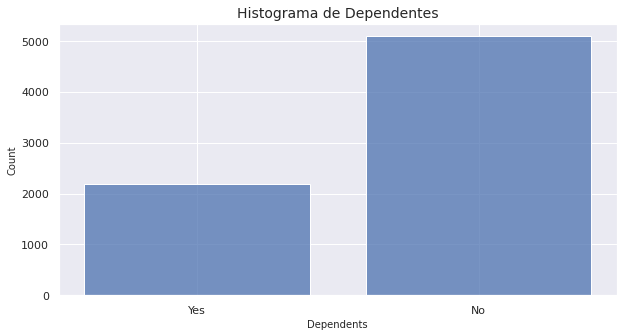

In [1301]:
ax = sns.histplot(df["Dependents"] , shrink=.8,  bins = 2)
ax.axes.set_title('Histograma de Dependentes', fontsize = 14)
plt.show()

OBS: Indica se o cliente possui ou não dependentes. Dtype:Object. Dados indicam que a maioria dos clientes não possuem dependentes.

#### tenure

In [1302]:
df["tenure"].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [1303]:
df["tenure"].dtype

dtype('int64')

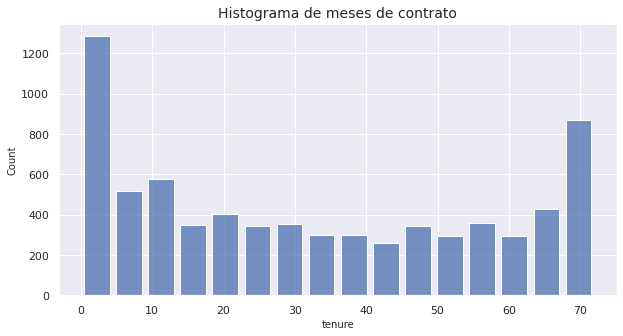

In [1304]:
ax = sns.histplot(df["tenure"] , shrink=.8)
ax.axes.set_title('Histograma de meses de contrato', fontsize = 14)
plt.show()

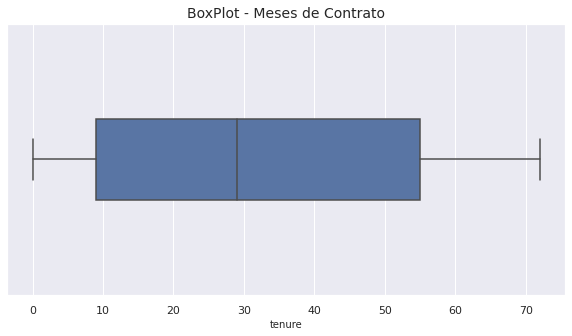

In [1305]:
ax = sns.boxplot(x=df["tenure"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Meses de Contrato', fontsize = 14)
plt.show()

OBS: Indica os meses de contrato do cliente.Dtype:Int

####PhoneService

In [1306]:
df["PhoneService"].unique()

array(['Yes', 'No'], dtype=object)

In [1307]:
df["PhoneService"].value_counts()

Yes    6560
No      707
Name: PhoneService, dtype: int64

In [1308]:
Perc_telefone_nao = (len(df.loc[(df["PhoneService"] == "No")]) / len(df))*100
Perc_telefone_sim = (len(df.loc[(df["PhoneService"] == "Yes")]) / len(df))*100
print ("[SERVIÇO TELEFONICO] Percentual de clientes que possuem serviço telefone = {:.2f}%".format(Perc_telefone_sim))
print ("[SERVIÇO TELEFOnICO] Percentual de clientes que não possuem seriço telefone = {:.2f}%".format(Perc_telefone_nao))

[SERVIÇO TELEFONICO] Percentual de clientes que possuem serviço telefone = 90.27%
[SERVIÇO TELEFOnICO] Percentual de clientes que não possuem seriço telefone = 9.73%


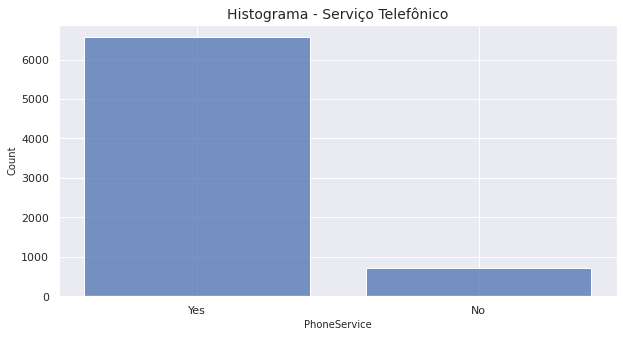

In [1309]:
ax = sns.histplot(df["PhoneService"] , shrink=.8)
ax.axes.set_title('Histograma - Serviço Telefônico', fontsize = 14)
plt.show()

OBS:Indica se o cliente tem assinatura de serviço telefônico. Dtype: Object. Dados indicam que a maioria dos clientes possui serviço de telefone.

####MultipleLines

In [1310]:
df["MultipleLines"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [1311]:
df["MultipleLines"].value_counts()

No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64

In [1312]:
Perc_multilinhas_nao = (len(df.loc[(df["MultipleLines"] == "No")]) / len(df.loc[(df["PhoneService"] == "Yes")]))*100
Perc_multilinhas_sim = (len(df.loc[(df["MultipleLines"] == "Yes")]) / len(df.loc[(df["PhoneService"] == "Yes")]))*100
print("No grupo que possui SERVIÇO TELEFONICO")
print ("[MULTIPLAS LINHAS] Percentual possuem multiplas linhas = {:.2f}%".format(Perc_multilinhas_sim))
print ("[MULTIPLAS LINHAS] Percentual não possuem multiplas linhas = {:.2f}%".format(Perc_multilinhas_nao))

No grupo que possui SERVIÇO TELEFONICO
[MULTIPLAS LINHAS] Percentual possuem multiplas linhas = 46.72%
[MULTIPLAS LINHAS] Percentual não possuem multiplas linhas = 53.28%


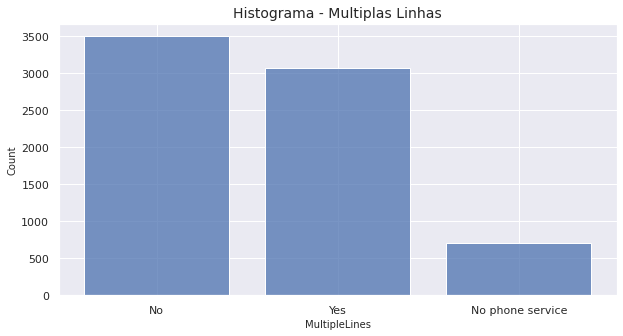

In [1313]:
ax = sns.histplot(df["MultipleLines"] , shrink=.8)
ax.axes.set_title('Histograma - Multiplas Linhas', fontsize = 14)
plt.show()

OBS: Indica se o cliente tem assinatura de mais de uma linha de telefone. Dtype: Object. Distribuição de dados indica que dentre os possuem serviço telefônico, os numero dos que  não possuem multiplas linhas é um pouco maior do que os que possuem.

#### InternetService

In [1314]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [1315]:
df["InternetService"].value_counts()

Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64

In [1316]:
Perc_internet_nao = (len(df[(df["InternetService"] == "No")]) / len(df))*100
Perc_internet_sim = (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ]) / len(df))*100
print ("[SERVICO INTERNET (DSL/FIBRA)] Percentual possuem internet = {:.2f}%".format(Perc_internet_sim))
print ("[SERVICO INTERNET (DSL/FIBRA)] Percentual não possuem internet = {:.2f}%".format(Perc_internet_nao))

[SERVICO INTERNET (DSL/FIBRA)] Percentual possuem internet = 78.24%
[SERVICO INTERNET (DSL/FIBRA)] Percentual não possuem internet = 21.76%


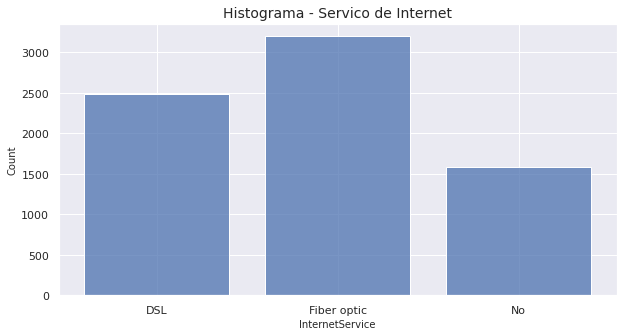

In [1317]:
ax = sns.histplot(df["InternetService"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Internet', fontsize = 14)
plt.show()

OBS:Indica se o cliente possui assinatura de um provedor internet.Dtype: Object. Numero de clientes com serviço de internet(DSL ou Fibra) é maior do que os que não possuem.

#### OnlineSecurity

In [1318]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [1319]:
df["OnlineSecurity"].value_counts()

No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64

In [1320]:
Perc_onlinesecurity_nao = (len(df[(df["OnlineSecurity"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_onlinesecurity_sim = (len(df[(df["OnlineSecurity"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[SEGURANÇA ONLINE] Percentual possuem segurança online = {:.2f}%".format(Perc_onlinesecurity_sim))
print ("[SEGURANÇA ONLINE] Percentual não possuem segurança online = {:.2f}%".format(Perc_onlinesecurity_nao))

No grupo que possui SERVIÇO INTERNET
[SEGURANÇA ONLINE] Percentual possuem segurança online = 36.55%
[SEGURANÇA ONLINE] Percentual não possuem segurança online = 63.45%


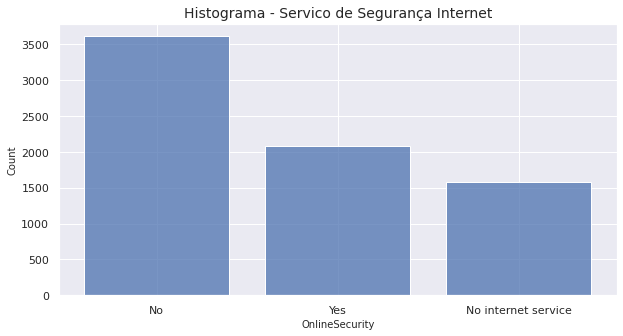

In [1321]:
ax = sns.histplot(df["OnlineSecurity"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Segurança Internet', fontsize = 14)
plt.show()

OBS:Indica se o cliente possui assinatura adicional de segurança online. Dtype: Object. Dados indicam que entre os que possuem serviço de internet, o  numero de quem não possui segurança é maior do que os que possuem.

####OnlineBackup

In [1322]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [1323]:
df["OnlineBackup"].value_counts()

No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64

In [1324]:
Perc_onlinebackup_nao = (len(df[(df["OnlineBackup"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_onlinebackup_sim = (len(df[(df["OnlineBackup"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[BACKUP ONLINE] Percentual possuem backup online = {:.2f}%".format(Perc_onlinebackup_sim))
print ("[BACKUP ONLINE] Percentual não possuem backup online = {:.2f}%".format(Perc_onlinebackup_nao))

No grupo que possui SERVIÇO INTERNET
[BACKUP ONLINE] Percentual possuem backup online = 44.04%
[BACKUP ONLINE] Percentual não possuem backup online = 55.96%


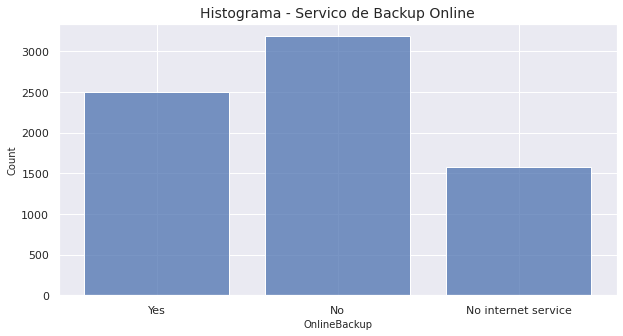

In [1325]:
ax = sns.histplot(df["OnlineBackup"] , shrink=.8)
ax.axes.set_title('Histograma - Servico de Backup Online', fontsize = 14)
plt.show()

OBS:Indica assinatura adicional de backup online.Dtype: Object. Dados mostram que entre os cliente que possuem serviço de internet é maior o numero dos que não possuem backup online.

####DeviceProtection

In [1326]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [1327]:
df["DeviceProtection"].value_counts()

No                     3195
Yes                    2491
No internet service    1581
Name: DeviceProtection, dtype: int64

In [1328]:
Perc_deviceprote_nao = (len(df[(df["DeviceProtection"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_deviceprote_sim = (len(df[(df["DeviceProtection"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[PROTEÇÃO APARELHO] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_deviceprote_sim))
print ("[PROTEÇÃO DE APARELHO] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_deviceprote_nao))

No grupo que possui SERVIÇO INTERNET
[PROTEÇÃO APARELHO] Percentual possuem proteção de aparelho= 43.81%
[PROTEÇÃO DE APARELHO] Percentual não possuem proteção de aparelho = 56.19%


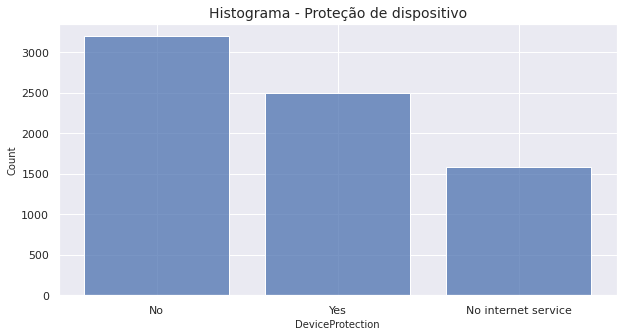

In [1329]:
ax = sns.histplot(df["DeviceProtection"] , shrink=.8)
ax.axes.set_title('Histograma - Proteção de dispositivo', fontsize = 14)
plt.show()

OBS:#Indica se o cliente possui  assinatura adicional de proteção no dispositivo. Dtype:Object. Numero dos cleintes que não possuem serviço um pouco maior do que os que possuem.

####TechSupport

In [1330]:
df["TechSupport"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [1331]:
df["TechSupport"].value_counts()

No                     3582
Yes                    2104
No internet service    1581
Name: TechSupport, dtype: int64

In [1332]:
Perc_suportetec_nao = (len(df[(df["TechSupport"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_suportetec_sim = (len(df[(df["TechSupport"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[SUPORTE TÉCNICO] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_suportetec_sim))
print ("[SUPORTE TÉCNICO] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_suportetec_nao))

No grupo que possui SERVIÇO INTERNET
[SUPORTE TÉCNICO] Percentual possuem proteção de aparelho= 37.00%
[SUPORTE TÉCNICO] Percentual não possuem proteção de aparelho = 63.00%


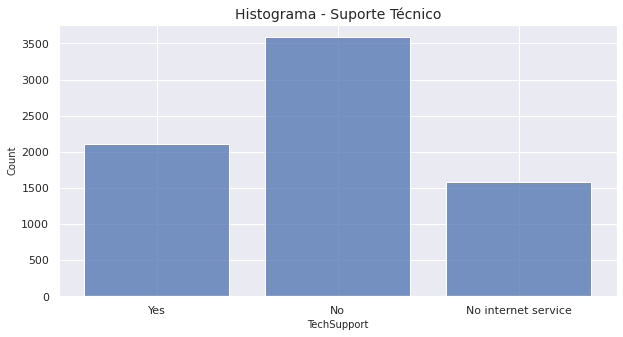

In [1333]:
ax = sns.histplot(df["TechSupport"] , shrink=.8)
ax.axes.set_title('Histograma - Suporte Técnico', fontsize = 14)
plt.show()

OBS: Indica se ocliente possui assinatura adicional de suporte técnico, menos tempo de espera.Dtype:Object.
Numero de clientes que não possuem o serviço, maior do que os que possuem.

####StreamingTV

In [1334]:
df["StreamingTV"].unique() 

array(['Yes', 'No', 'No internet service'], dtype=object)

In [1335]:
df["StreamingTV"].value_counts()

No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV, dtype: int64

In [1336]:
Perc_streamingTV_nao = (len(df[(df["StreamingTV"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_streamingTV_sim = (len(df[(df["StreamingTV"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[STREAMING TV] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_streamingTV_sim))
print ("[STREAMING TV] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_streamingTV_nao))

No grupo que possui SERVIÇO INTERNET
[STREAMING TV] Percentual possuem proteção de aparelho= 49.07%
[STREAMING TV] Percentual não possuem proteção de aparelho = 50.93%


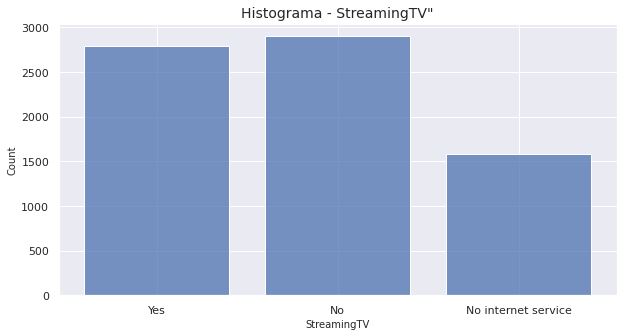

In [1337]:
ax = sns.histplot(df["StreamingTV"] , shrink=.8)
ax.axes.set_title('Histograma - StreamingTV"', fontsize = 14)
plt.show()

OBS: Indica  assinatura de TV a cabo. Dtype: Object. Dados igualmente distribuidos entre os clientes que possuem o serviço de internet.

####StreamingMovies

In [1338]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [1339]:
df["StreamingMovies"].value_counts()

No                     2870
Yes                    2816
No internet service    1581
Name: StreamingMovies, dtype: int64

In [1340]:
Perc_streamingmovies_nao = (len(df[(df["StreamingMovies"] == "No")]) / (len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ))*100
Perc_streamingmovies_sim = (len(df[(df["StreamingMovies"] == "Yes")])/(len(df[(df["InternetService"] == "DSL") | (df["InternetService"] == "Fiber optic") ])  ) )*100
print("No grupo que possui SERVIÇO INTERNET")
print ("[STREAMING MOVIES] Percentual possuem proteção de aparelho= {:.2f}%".format(Perc_streamingmovies_sim))
print ("[STREAMING MOVIES] Percentual não possuem proteção de aparelho = {:.2f}%".format(Perc_streamingmovies_nao))

No grupo que possui SERVIÇO INTERNET
[STREAMING MOVIES] Percentual possuem proteção de aparelho= 49.53%
[STREAMING MOVIES] Percentual não possuem proteção de aparelho = 50.47%


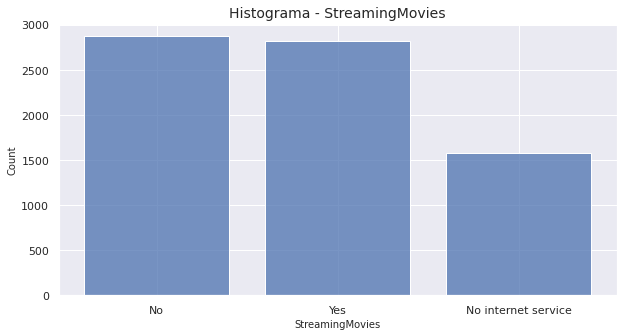

In [1341]:
ax = sns.histplot(df["StreamingMovies"] , shrink=.8)
ax.axes.set_title('Histograma - StreamingMovies', fontsize = 14)
plt.show()

OBS: Indica assinatura de streaming de filmes. Dtype: Object. Dados igualmente distribuidos entre os que assinam o serviço de internet.

####Contract

In [1342]:
df["Contract"].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [1343]:
df["Contract"].value_counts()

Month-to-month    4005
Two year          1743
One year          1519
Name: Contract, dtype: int64

In [1344]:
Perc_contrato_1ano = (len(df[(df["Contract"] == "One year")]) / (len(df)))*100
Perc_contrato_mes = (len(df[(df["Contract"] == "Month-to-month")]) / (len(df)))*100
Perc_contrato_2ano = (len(df[(df["Contract"] == "Two year")]) / (len(df)))*100
print ("[CONTRATO] Percentual com contrato de 1 ano {:.2f}%".format(Perc_contrato_1ano ))
print ("[CONTRATO] Percentual com contrato de 2 anos= {:.2f}%".format(Perc_contrato_2ano ))
print ("[CONTRATO] Percentual com contrato mensal = {:.2f}%".format(Perc_contrato_mes))

[CONTRATO] Percentual com contrato de 1 ano 20.90%
[CONTRATO] Percentual com contrato de 2 anos= 23.99%
[CONTRATO] Percentual com contrato mensal = 55.11%


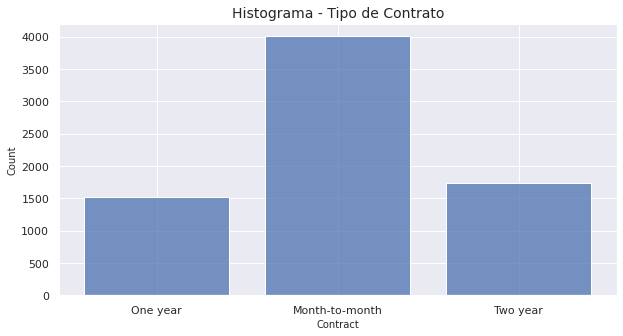

In [1345]:
ax = sns.histplot(df["Contract"] , shrink=.8)
ax.axes.set_title('Histograma - Tipo de Contrato', fontsize = 14)
plt.show()

OBS:Indica tipo de contrato. Dtype: Object. Três tipo de contrato, sendo que a maioria dos clientes tem o plano mensal.

####PaperlessBilling

In [1346]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [1347]:
df["PaperlessBilling"].value_counts()

Yes    4311
No     2956
Name: PaperlessBilling, dtype: int64

In [1348]:
Perc_contadigital_sim = (len(df[(df["PaperlessBilling"] == "Yes")]) / (len(df)))*100
Perc_contadigital_nao = (len(df[(df["PaperlessBilling"] == "No")]) / (len(df)))*100
print ("[CONTA DIGITAL] Percentual com conta digital {:.2f}%".format(Perc_contadigital_sim ))
print ("[CONTA DIGITAL] Percentual sem conta digital= {:.2f}%".format(Perc_contadigital_nao ))

[CONTA DIGITAL] Percentual com conta digital 59.32%
[CONTA DIGITAL] Percentual sem conta digital= 40.68%


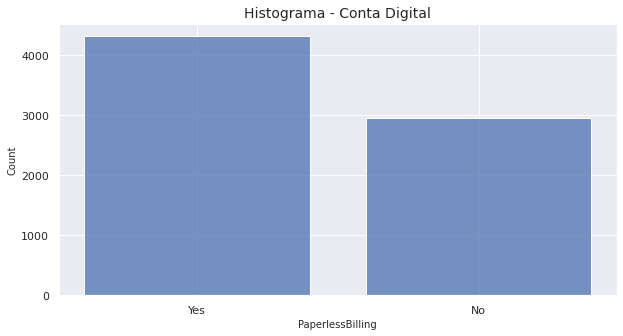

In [1349]:
ax = sns.histplot(df["PaperlessBilling"] , shrink=.8)
ax.axes.set_title('Histograma - Conta Digital', fontsize = 14)
plt.show()

OBS: Indica se o cliente prefere receber online a fatura. Dtype: Object. Maioria dos clientes usam conta digital.

####PaymentMethod

In [1350]:
df["PaymentMethod"].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [1351]:
df["PaymentMethod"].value_counts()

Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: PaymentMethod, dtype: int64

In [1352]:
Perc_eletroniccheck = (len(df[(df["PaymentMethod"] == "Electronic check")]) / (len(df)))*100
Perc_mailedcheck = (len(df[(df["PaymentMethod"] == "Mailed check")]) / (len(df)))*100
Perc_banktransfer = (len(df[(df["PaymentMethod"] == "Bank transfer (automatic)")]) / (len(df)))*100
Perc_creditcard = (len(df[(df["PaymentMethod"] == "Credit card (automatic)")]) / (len(df)))*100
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cheque eletronico {:.2f}%".format(Perc_eletroniccheck ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cheque postal= {:.2f}%".format(Perc_mailedcheck ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Ttransferencia bancária {:.2f}%".format(Perc_banktransfer ))
print ("[METODO DE PAGAMENTO] Percentual com pagamento Cartão de Crédito= {:.2f}%".format(Perc_creditcard ))

[METODO DE PAGAMENTO] Percentual com pagamento Cheque eletronico 33.65%
[METODO DE PAGAMENTO] Percentual com pagamento Cheque postal= 22.91%
[METODO DE PAGAMENTO] Percentual com pagamento Ttransferencia bancária 21.87%
[METODO DE PAGAMENTO] Percentual com pagamento Cartão de Crédito= 21.58%


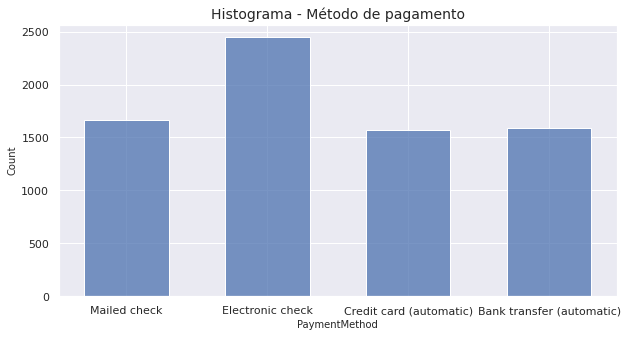

In [1353]:
ax = sns.histplot(df["PaymentMethod"] , shrink=.6)
ax.axes.set_title('Histograma - Método de pagamento', fontsize = 14)

plt.show()

OBS: Indica forma de pagamento. Dtype:Object. Podendo apresentar os valores: Electronic check, Mailed check,Brank transfer(automatic), Credt card(automatic)

####Charges.Monthly

In [1354]:
df["Charges.Monthly"].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [1355]:
df["Charges.Monthly"].value_counts()

20.05     65
19.85     46
19.90     46
19.70     45
19.55     45
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: Charges.Monthly, Length: 1585, dtype: int64

In [1356]:
df["Charges.Monthly"].dtype

dtype('float64')

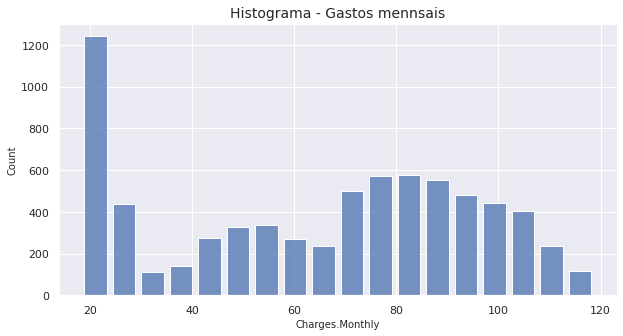

In [1357]:
ax = sns.histplot(df["Charges.Monthly"] , shrink=.8)
ax.axes.set_title('Histograma - Gastos mennsais', fontsize = 14)
plt.show()

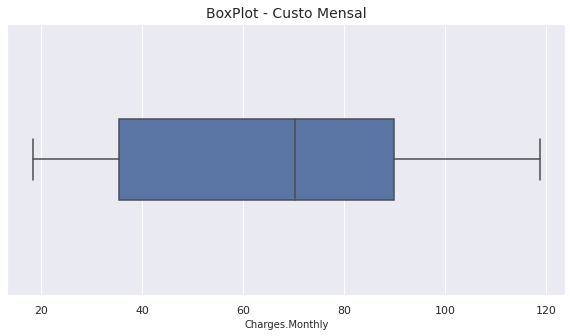

In [1358]:
ax = sns.boxplot(x=df["Charges.Monthly"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Custo Mensal', fontsize = 14)
plt.show()

OBS: Indica total de todos os serviços do cliente por mês. Dtype: Float. 

####Charges.Total

In [1359]:
df["Charges.Total"].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

OBS: Indica o total gasto pelo cliente. Esta coluna deveria ser float e não objeto

### <i>Corrigindo inconsistências </i>

[CHURN] - Apresenta em torno de 3% de dados sem valor definido. 
O objetivo deste projeto é identificar/relacionar o churn, se um registro não contem esta informação, o dado não é util
Considerando o baixo valor percentual, os dados estão sendo removidos do dataframe

In [1360]:
df.drop( df[(df["Churn"] == "")].index, inplace = True, axis = 0)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [1361]:
df.shape

(7043, 21)

[Charges.Total]: O valor desta coluna deveria ser float e não object, por se tratar de valor monetário.

In [1362]:
df["Charges.Total"] = round(pd.to_numeric(df["Charges.Total"], errors='coerce'),2)

In [1363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


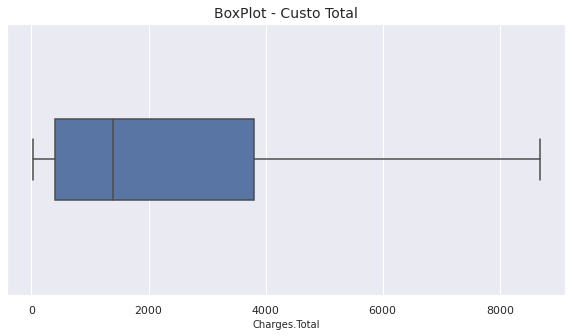

In [1364]:
ax = sns.boxplot(x=df["Charges.Total"] ,width = 0.3)
ax.axes.set_title('BoxPlot - Custo Total', fontsize = 14)
plt.show()


Após a conversão "Charges.Total" para float, apareceram 11 valores nulos, provenientes de strings vazias " ".
Estes foram substituidos por zero. 
No entanto, considerando que estes clientes apresentam dado mensal, o valor total teria que ser no minino igual ao mes.
Talvez fosse  mais adequado apagar os 11 dados, parece haver algum tipo de inconsistência nos dados.


In [1365]:
df["Charges.Total"].isnull().sum()

11

In [1366]:
#df["Charges.Total"].fillna(0, inplace = True)

In [1367]:
df["Charges.Total"].fillna(df["Charges.Monthly"],inplace = True)


In [1368]:
df.loc[(df["Charges.Total"] == 0 )]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


Algumas colunas apresentam os valores:"Yes"/"No"/"No service".

O valor "No service" destas colunas pode ser substituido para "No" sem comprometimento de informação.

Foram tambem alterados os valores Yes/ No, para valores numéricos (1/0)

In [1369]:
dados_yes_no = ["Churn","Partner", "Dependents","PhoneService","PaperlessBilling", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

In [1370]:
for column in dados_yes_no:
  df[column] = df[column].replace({"No internet service":0, "No phone service": 0, "No": 0, "Yes":1})

In [1371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


### <i> Adicionando nova coluna - contas diárias </i>

Criar uma  nova coluna contendo os gastos diários do(cliente) e iinsira na posição 18 do DataFrame

In [1372]:
df.insert(loc = 18, column = 'gasto_diario',  value = round(df["Charges.Monthly"]/30,2) )

In [1373]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,gasto_diario,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,2.80,Mailed check,83.9,267.40


### <i>Alguns tratamentos nos dados </i>

Alterando os dados de gênero para: 0 - Masculino e 1 Feminino

In [1374]:
df.insert(loc = 2 , column = 'genero' ,  value = df["gender"].map(dic_Sexo))
df= df.drop("gender",axis=1)

### <i> Traduzindo para português </i>

In [1375]:
df.rename(columns={
                  'customerID':  "ID_cliente" ,
                  'SeniorCitizen': "senioridade", 
                  'Partner' : "parceiro",
                  'Dependents': "dependentes",
                  'PhoneService' :"servico_telefonico",
                  'tenure': 'meses_contrato',
                  'MultipleLines': 'multiplas_linhas',
                  'InternetService': 'servico_internet',
                  'OnlineBackup':'backup_online',
                  'OnlineSecurity': 'seguranca_online',
                  'DeviceProtection': 'protecao_aparelho',
                  'TechSupport': 'suporte_tecnico',
                  'StreamingTV': 'streamning_TV',
                  'StreamingMovies': 'streaming_filmes',
                  'PaperlessBilling': "conta_digital",
                  'Contract': 'contrato',
                  'PaymentMethod':'metodo_pagamento',
                  'Charges.Monthly':'gasto_mensal',
                  'Charges.Total':'gasto_total',
                  },
          inplace=True) 

In [1376]:
df.head()

,ID_cliente,Churn,genero,senioridade,parceiro,dependentes,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_aparelho,suporte_tecnico,streamning_TV,streaming_filmes,contrato,conta_digital,gasto_diario,metodo_pagamento,gasto_mensal,gasto_total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,2.80,Mailed check,83.9,267.40


Alterando os valores da coluna PaymentMethod para portugues

In [1377]:
df["metodo_pagamento"] = df["metodo_pagamento"].replace({"Electronic check": "cheque_eletronico" ,"Mailed check": "cheque_postal" ,"Bank transfer (automatic)": "transferencia_bancária","Credit card (automatic)": "cartao_credito"})

Alterando os valores da coluna Contract para portugues:

In [1378]:
df["contrato"] = df["contrato"].replace({'One year': "1_ano", 'Month-to-month': "mensal", 'Two year':"2_anos"})

In [1379]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_cliente          7043 non-null   object 
 1   Churn               7043 non-null   int64  
 2   genero              7043 non-null   int64  
 3   senioridade         7043 non-null   int64  
 4   parceiro            7043 non-null   int64  
 5   dependentes         7043 non-null   int64  
 6   meses_contrato      7043 non-null   int64  
 7   servico_telefonico  7043 non-null   int64  
 8   multiplas_linhas    7043 non-null   int64  
 9   servico_internet    7043 non-null   object 
 10  seguranca_online    7043 non-null   int64  
 11  backup_online       7043 non-null   int64  
 12  protecao_aparelho   7043 non-null   int64  
 13  suporte_tecnico     7043 non-null   int64  
 14  streamning_TV       7043 non-null   int64  
 15  streaming_filmes    7043 non-null   int64  
 16  contra

### <i> Salvando DataFrame -arquivo CSV</i>

In [1380]:
df.to_csv("Telco-Customer-Churn.csv", index=False)

## <b>CARDS - SEMANA 1</b>

- Estruturação e Analise do Dataframe a partir de dados JSON

- Identificação e tratamento de inconsistências:

  01 - Churn com valores Yes, No e valores vazios. Os valores vazios representavam em torno de 3% do dataset e foram removidos.

  02 - Charges.Total: total gasto pelo cliente: o valor desta coluna foi alterado de para float, por ser um valor monetário. Após esta alteração, apareceram 11 valores vazios nesta coluna, que foram substituidos pela valor mensal, supondo trataram-se de assinantes no primeiro mes de assinatura.

  03 - Substituição dos valores "No Phone/Internet Service" por "No". E na sequencia substituido valores No/Yes por 0/1

- Tradução de colunas realizada

- Adição uma nova coluna na posição 18,contendo o gasto diário.

- Os dados foram substituidos por numeros, exceto as seguintes colunas:

  01.ID_cliente

  02.servico_internet

  03.contrato

  04.metodo_pagamento


# <b> SEMANA 02 - Visualização dos dados</i></b>

### Imports

In [1381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

### <i>Carregando o arquivo de dados para analises gráficas </i>

In [1382]:
df_grafico = pd.read_csv("Telco-Customer-Churn.csv")
df_grafico.head(3)

,ID_cliente,Churn,genero,senioridade,parceiro,dependentes,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_aparelho,suporte_tecnico,streamning_TV,streaming_filmes,contrato,conta_digital,gasto_diario,metodo_pagamento,gasto_mensal,gasto_total
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,1_ano,1,2.19,cheque_postal,65.6,593.30
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,mensal,0,2.00,cheque_postal,59.9,542.40
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,mensal,1,2.46,cheque_eletronico,73.9,280.85


### Alteração variáveis numéricas para texto

Na semana anterior , ja foi feita a alteração da maioria das variáveis para valores numericos. Apenas para facilitar a leitura/criação dos gráficos, algumas variaveis foram alteradas novamente.

In [1383]:
df_grafico["Churn"] = df_grafico["Churn"].replace({0: "Não" , 1: "Sim"})
df_grafico["genero"] = df_grafico["genero"].replace({0: "Masculino", 1: "Feminino"})
df_grafico["senioridade"] = df_grafico["senioridade"].replace({0: "MENOS_65", 1: "MAIS_65"})
df_grafico["parceiro"] = df_grafico["parceiro"].replace({0: "Não" , 1: "Sim"})
df_grafico["dependentes"] = df_grafico["dependentes"].replace({0: "Não" , 1: "Sim"})
df_grafico["servico_telefonico"] = df_grafico["servico_telefonico"].replace({0: "Não" , 1: "Sim"})
df_grafico["multiplas_linhas"] = df_grafico["multiplas_linhas"].replace({0: "Não" , 1: "Sim"})
df_grafico["seguranca_online "] = df_grafico["seguranca_online"].replace({0: "Não" , 1: "Sim"})
df_grafico["backup_online"] = df_grafico["backup_online"].replace({0: "Não" , 1: "Sim"})
df_grafico["protecao_aparelho"] = df_grafico["protecao_aparelho"].replace({0: "Não" , 1: "Sim"})
df_grafico["suporte_tecnico"] = df_grafico["suporte_tecnico"].replace({0: "Não" , 1: "Sim"})
df_grafico["streamning_TV"] = df_grafico["streamning_TV"].replace({0: "Não" , 1: "Sim"})
df_grafico["streaming_filmes"] = df_grafico["streaming_filmes"].replace({0: "Não" , 1: "Sim"})
df_grafico["conta_digital"] = df_grafico["conta_digital"].replace({0: "Não" , 1: "Sim"})
df_grafico.head(3)

,ID_cliente,Churn,genero,senioridade,parceiro,dependentes,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,suporte_tecnico,streamning_TV,streaming_filmes,contrato,conta_digital,gasto_diario,metodo_pagamento,gasto_mensal,gasto_total,seguranca_online
0,0002-ORFBO,Não,Feminino,MENOS_65,Sim,Sim,9,Sim,Não,DSL,...,Sim,Sim,Não,1_ano,Sim,2.19,cheque_postal,65.6,593.30,Não
1,0003-MKNFE,Não,Masculino,MENOS_65,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Sim,mensal,Não,2.00,cheque_postal,59.9,542.40,Não
2,0004-TLHLJ,Sim,Masculino,MENOS_65,Não,Não,4,Sim,Não,Fiber optic,...,Não,Não,Não,mensal,Sim,2.46,cheque_eletronico,73.9,280.85,Não


### <i>
 - Visualizar a distribuição da variável target 
 - Analise da variavel target ( churn)  com relação as outras categorias
 - Criação de  visualizações relevantes em relação ao Churn </i>

#### genero

In [1384]:
churn_genero = pd.DataFrame(columns = ["masculino", "feminino"], index  = ["Churn_sim", "Churn_não"])
churn_genero["masculino"]= [df_grafico["ID_cliente"].loc[((df_grafico["genero"] == "Masculino") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["genero"] == "Masculino") & (df_grafico["Churn"] == "Não"))].count()]
churn_genero["feminino"]=[df_grafico["ID_cliente"].loc[((df_grafico["genero"] == "Feminino") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["genero"] == "Feminino") & (df_grafico["Churn"] == "Não"))].count() ]
churn_genero    

,masculino,feminino
Churn_sim,930,939
Churn_não,2625,2549


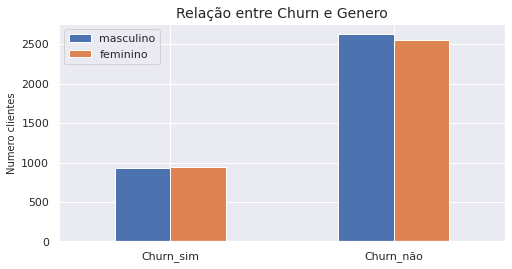

In [1385]:
churn_genero.plot.bar (rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Genero", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()


Valores entre os generos (masculino/feminino) em relação ao churn são similares, não parece exisitir relação entre eles, em numeros absolutos.

#### parceiro


In [1386]:
churn_parceiro = pd.DataFrame(columns = ["Sem Parceiro", "Com Parceiro"], index  = ["Churn_sim", "Churn_não"])
churn_parceiro["Sem Parceiro"]= [df_grafico["ID_cliente"].loc[((df_grafico["parceiro"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["parceiro"] == "Não") & (df_grafico["Churn"] == "Não"))].count()]
churn_parceiro["Com Parceiro"]=[df_grafico["ID_cliente"].loc[((df_grafico["parceiro"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["parceiro"] == "Sim") & (df_grafico["Churn"] == "Não"))].count() ]
churn_parceiro    

,Sem Parceiro,Com Parceiro
Churn_sim,1200,669
Churn_não,2441,2733


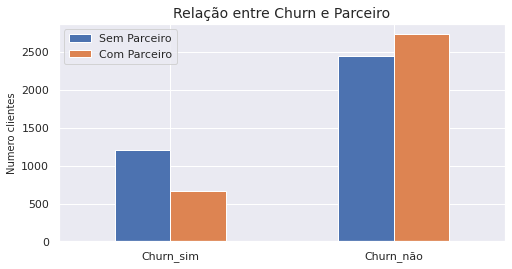

In [1387]:
churn_parceiro.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Parceiro", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores na categoria parceiro (SIM/NAO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem parceiro, em numeros absolutos.

#### dependentes


In [1388]:
churn_dependentes = pd.DataFrame(columns = ["Sem Dependentes", "Com Dependentes"], index  = ["Churn_sim", "Churn_não"])
churn_dependentes["Sem Dependentes"]= [df_grafico["ID_cliente"].loc[((df_grafico["dependentes"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["dependentes"] == "Não") & (df_grafico["Churn"] == "Não"))].count()]
churn_dependentes["Com Dependentes"]=[df_grafico["ID_cliente"].loc[((df_grafico["dependentes"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["dependentes"] == "Sim") & (df_grafico["Churn"] == "Não"))].count() ]
churn_dependentes

,Sem Dependentes,Com Dependentes
Churn_sim,1543,326
Churn_não,3390,1784


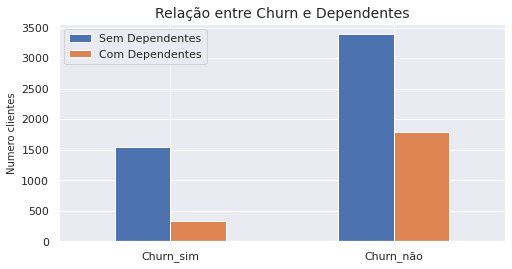

In [1389]:
churn_dependentes.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Dependentes", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores na categoria dependentes (SIM/NAO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem dependentes, em numeros absolutos.

#### conta_digital



In [1390]:
churn_conta_digital = pd.DataFrame(columns = ["Sem Conta Digital", "Com Conta Digital"], index  = ["Churn_sim", "Churn_não"])
churn_conta_digital["Sem Conta Digital"]= [df_grafico["ID_cliente"].loc[((df_grafico["conta_digital"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["conta_digital"] == "Não") & (df_grafico["Churn"] == "Não"))].count()]
churn_conta_digital["Com Conta Digital"]=[df_grafico["ID_cliente"].loc[((df_grafico["conta_digital"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["conta_digital"] == "Sim") & (df_grafico["Churn"] == "Não"))].count() ]
churn_conta_digital

,Sem Conta Digital,Com Conta Digital
Churn_sim,469,1400
Churn_não,2403,2771


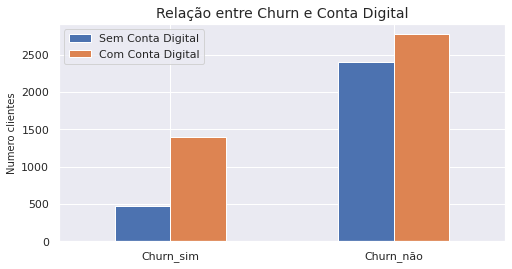

In [1391]:
churn_conta_digital.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Conta Digital", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores na categoria conta digital(SIM/NAO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que  possuem conta_digital, em numeros absolutos.

#### servico_telefonico

In [1392]:
churn_servico_telefonico = pd.DataFrame(columns = ["Sem Servico Telefonico", "Com Servico Telefonico"], index  = ["Churn_sim", "Churn_não"])
churn_servico_telefonico ["Sem Servico Telefonico"]= [df_grafico["ID_cliente"].loc[((df_grafico["servico_telefonico"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["servico_telefonico"] == "Não") & (df_grafico["Churn"] == "Não"))].count()]
churn_servico_telefonico ["Com Servico Telefonico"]=[df_grafico["ID_cliente"].loc[((df_grafico["servico_telefonico"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["servico_telefonico"] == "Sim") & (df_grafico["Churn"] == "Não"))].count() ]
churn_servico_telefonico 

,Sem Servico Telefonico,Com Servico Telefonico
Churn_sim,170,1699
Churn_não,512,4662


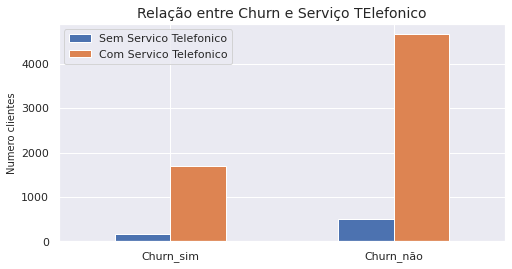

In [1393]:
churn_servico_telefonico.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Serviço TElefonico", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores na categoria servico telefonico(SIM/NAO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que  possuem servico telefonico, em numeros absolutos.

#### senioridade



In [1394]:
churn_seneoridade = pd.DataFrame(columns = ["MENOS_65", "MAIS_65"], index  = ["Churn_sim", "Churn_não"])
churn_seneoridade ["MENOS_65"]= [df_grafico["ID_cliente"].loc[((df_grafico["senioridade"] == "MENOS_65") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["senioridade"] == "MENOS_65") & (df_grafico["Churn"] == "Não"))].count()]
churn_seneoridade ["MAIS_65"]=[df_grafico["ID_cliente"].loc[((df_grafico["senioridade"] == "MAIS_65") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["senioridade"] == "MAIS_65") & (df_grafico["Churn"] == "Não"))].count() ]
churn_seneoridade 



,MENOS_65,MAIS_65
Churn_sim,1393,476
Churn_não,4508,666


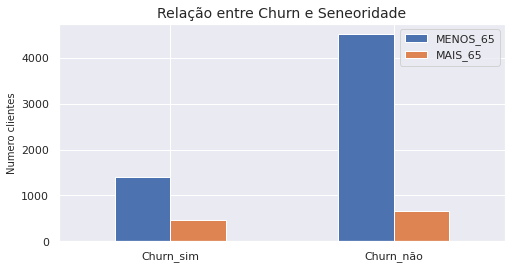

In [1395]:
churn_seneoridade.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Seneoridade", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores na categoria seneoridade(MENOS_65/MAIS_65) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes com MENOS de 65 anos, em numeros absolutos.

####  servico_internet
  


In [1396]:
churn_servico_internet = pd.DataFrame(columns = ["DSL", "Fibra Otica","Sem internet"], index  = ["Churn_sim", "Churn_não"])
churn_servico_internet ["DSL"]= [df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "DSL") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "DSL") & (df_grafico["Churn"] == "Não"))].count()]
churn_servico_internet ["Fibra Otica"]=[df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "Fiber optic") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "Fiber optic") & (df_grafico["Churn"] == "Não"))].count() ]
churn_servico_internet ["Sem internet"]=[df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "No") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["servico_internet"] == "No") & (df_grafico["Churn"] == "Não"))].count() ]
churn_servico_internet 

,DSL,Fibra Otica,Sem internet
Churn_sim,459,1297,113
Churn_não,1962,1799,1413


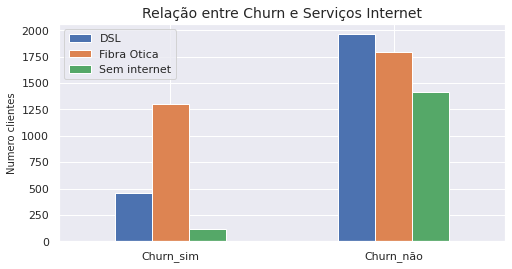

In [1397]:
churn_servico_internet.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Serviços Internet", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria serviço_internet(DSL/Fibra_otica/Sem_internet) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que possuem internet, e mais acentuado, nos que possuem Fibra otica, em numeros absolutos.

####metodo_pagamento


In [1398]:
churn_metodo_pagamento = pd.DataFrame(columns = ["Cheque Postal", "Cheque Eletronico","Cartao Credito", "Transf. Bancaria"], index  = ["Churn_sim", "Churn_não"])
churn_metodo_pagamento ["Cheque Postal"]= [df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cheque_postal") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cheque_postal") & (df_grafico["Churn"] == "Não"))].count()]
churn_metodo_pagamento ["Cheque Eletronico"]=[df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cheque_eletronico") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cheque_eletronico") & (df_grafico["Churn"] == "Não"))].count() ]
churn_metodo_pagamento ["Cartao Credito"]=[df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cartao_credito") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "cartao_credito") & (df_grafico["Churn"] == "Não"))].count() ]
churn_metodo_pagamento ["Transf. Bancaria"]=[df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "transferencia_bancária") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["metodo_pagamento"] == "transferencia_bancária") & (df_grafico["Churn"] == "Não"))].count() ]
churn_metodo_pagamento 

,Cheque Postal,Cheque Eletronico,Cartao Credito,Transf. Bancaria
Churn_sim,308,1071,232,258
Churn_não,1304,1294,1290,1286


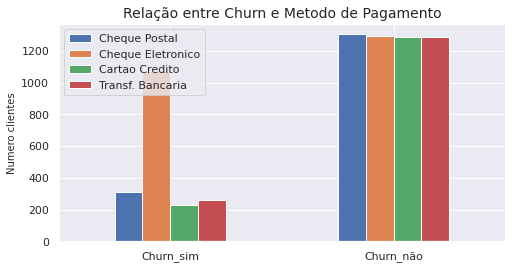

In [1399]:
churn_metodo_pagamento.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Metodo de Pagamento", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria metodo de pagamento(Cheque_Postal/Cheque_Eletronico/Cartao de Credito/TRansferencia Bancaria) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que efetuam pagamento em cheque eletronio, em numeros absolutos.

####contrato

In [1400]:
churn_contrato = pd.DataFrame(columns = ["mensal", "1 ano","2 anos"], index  = ["Churn_sim", "Churn_não"])
churn_contrato["mensal"]= [df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "mensal") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "mensal") & (df_grafico["Churn"] == "Não"))].count()]
churn_contrato["1 ano"]=[df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "1_ano") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "1_ano") & (df_grafico["Churn"] == "Não"))].count() ]
churn_contrato["2 anos"]=[df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "2_anos") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["contrato"] == "2_anos") & (df_grafico["Churn"] == "Não"))].count() ]
churn_contrato 

,mensal,1 ano,2 anos
Churn_sim,1655,166,48
Churn_não,2220,1307,1647


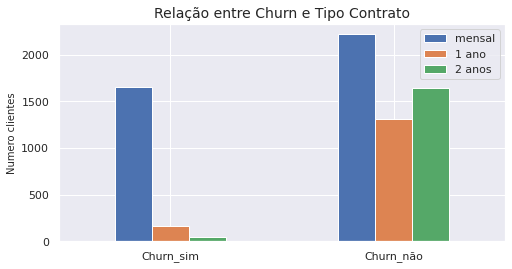

In [1401]:
churn_contrato.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Tipo Contrato", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria contrato(mensal/1 ano/ 2 anos) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que possuem contrato mensal, em numeros absolutos.

####multiplas_linhas

In [1402]:
df_grafico["multiplas_linhas"].unique()

array(['Não', 'Sim'], dtype=object)

In [1403]:
churn_multi_linhas = pd.DataFrame(columns = ["Com Multiplas Linhas", "Sem Multiplas Linhas"], index  = ["Churn_sim", "Churn_não"])
churn_multi_linhas["Com Multiplas Linhas"]= [df_grafico["ID_cliente"].loc[((df_grafico["multiplas_linhas"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["multiplas_linhas"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_multi_linhas["Sem Multiplas Linhas"]=[df_grafico["ID_cliente"].loc[((df_grafico["multiplas_linhas"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["multiplas_linhas"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_multi_linhas 

,Com Multiplas Linhas,Sem Multiplas Linhas
Churn_sim,850,1019
Churn_não,2121,3053


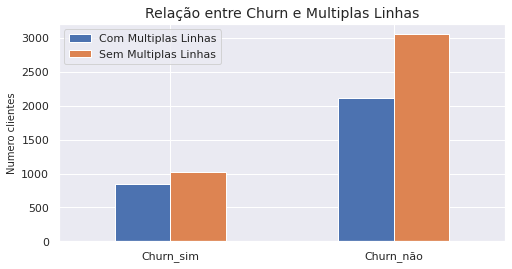

In [1404]:
churn_multi_linhas.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Multiplas Linhas", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria servico telefonico/multiplas linhas(SIM/NÃO) em relação ao churn , não é possivel observar uma tendencia maior de churn entre as categorias, valores muito próximos, em numeros absolutos.

#### segurança_online



In [1405]:
churn_seguranca_online = pd.DataFrame(columns = ["Com Segurança Online", "Sem Segurança Online"], index  = ["Churn_sim", "Churn_não"])
churn_seguranca_online["Com Segurança Online"]= [df_grafico["ID_cliente"].loc[((df_grafico["seguranca_online"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["seguranca_online"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_seguranca_online["Sem Segurança Online"]=[df_grafico["ID_cliente"].loc[((df_grafico["seguranca_online"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["seguranca_online"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_seguranca_online 

,Com Segurança Online,Sem Segurança Online
Churn_sim,0,0
Churn_não,0,0


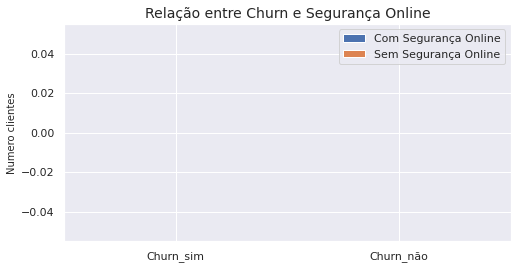

In [1406]:
churn_seguranca_online.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Segurança Online", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria seguranca_online(SIM/NÃO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem segurança online, em numeros absolutos.

####backup_online
 

In [1407]:
df_grafico["backup_online"].unique()

array(['Sim', 'Não'], dtype=object)

In [1408]:
churn_backup_online = pd.DataFrame(columns = ["Com Backup Online", "Sem Backup Online"], index  = ["Churn_sim", "Churn_não"])
churn_backup_online["Com Backup Online"]= [df_grafico["ID_cliente"].loc[((df_grafico["backup_online"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["backup_online"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_backup_online["Sem Backup Online"]=[df_grafico["ID_cliente"].loc[((df_grafico["backup_online"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["backup_online"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_backup_online 

,Com Backup Online,Sem Backup Online
Churn_sim,523,1346
Churn_não,1906,3268


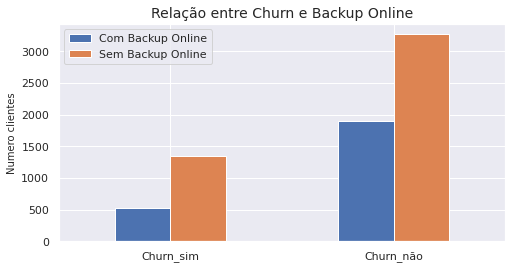

In [1409]:
churn_backup_online.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Backup Online", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria backup_online(SIM/NÃO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem backup online, em numeros absolutos.

#### protecao_aparelho

In [1410]:
churn_protecao_aparelho = pd.DataFrame(columns = ["Com Proteção Aparelho", "Sem Proteção Aparelho"], index  = ["Churn_sim", "Churn_não"])
churn_protecao_aparelho["Com Proteção Aparelho"]= [df_grafico["ID_cliente"].loc[((df_grafico["protecao_aparelho"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["protecao_aparelho"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_protecao_aparelho["Sem Proteção Aparelho"]=[df_grafico["ID_cliente"].loc[((df_grafico["protecao_aparelho"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["protecao_aparelho"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_protecao_aparelho

,Com Proteção Aparelho,Sem Proteção Aparelho
Churn_sim,545,1324
Churn_não,1877,3297


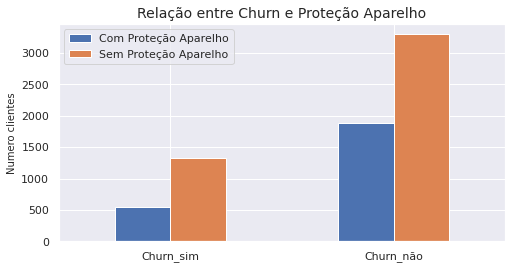

In [1411]:
churn_protecao_aparelho.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Proteção Aparelho", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria protecao_aparelho(SIM/NÃO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem proteção do aparelho, em numeros absolutos.

 #### suporte_tecnico


In [1412]:
churn_suporte_tecnico = pd.DataFrame(columns = ["Com Suporte Técnico", "Sem Suporte Técnico"], index  = ["Churn_sim", "Churn_não"])
churn_suporte_tecnico["Com Suporte Técnico"]= [df_grafico["ID_cliente"].loc[((df_grafico["suporte_tecnico"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["suporte_tecnico"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_suporte_tecnico["Sem Suporte Técnico"]=[df_grafico["ID_cliente"].loc[((df_grafico["suporte_tecnico"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["suporte_tecnico"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_suporte_tecnico

,Com Suporte Técnico,Sem Suporte Técnico
Churn_sim,310,1559
Churn_não,1734,3440


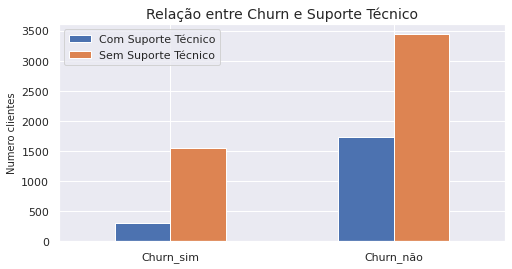

In [1413]:
churn_suporte_tecnico.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Suporte Técnico", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria suporte_tecnico(SIM/NÃO) em relação ao churn , é possivel observar uma tendencia maior de churn entre os clientes que não possuem suporte técnico, em numeros absolutos.

#### streaming_TV


In [1414]:
churn_streamning_TV = pd.DataFrame(columns = ["Com Streaming TV", "Sem Streaming TV"], index  = ["Churn_sim", "Churn_não"])
churn_streamning_TV["Com Streaming TV"]= [df_grafico["ID_cliente"].loc[((df_grafico["streamning_TV"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["streamning_TV"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_streamning_TV["Sem Streaming TV"]=[df_grafico["ID_cliente"].loc[((df_grafico["streamning_TV"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["streamning_TV"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_streamning_TV

,Com Streaming TV,Sem Streaming TV
Churn_sim,814,1055
Churn_não,1893,3281


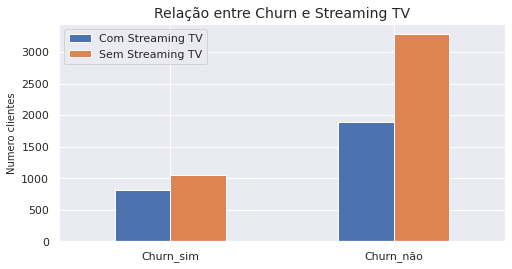

In [1415]:
churn_streamning_TV.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Streaming TV", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria streamning_TV(SIM/NÃO) em relação ao churn ,  não é possivel observar relação com o churn, valores similares, em numeros absolutos.

####streaming_filmes

In [1416]:
df_grafico["streaming_filmes"].unique()

array(['Não', 'Sim'], dtype=object)

In [1417]:
churn_streaming_filmes = pd.DataFrame(columns = ["Com Streaming Filmes", "Sem Streaming Filmes"], index  = ["Churn_sim", "Churn_não"])
churn_streaming_filmes["Com Streaming Filmes"]= [df_grafico["ID_cliente"].loc[((df_grafico["streaming_filmes"] == "Sim") & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["streaming_filmes"] == "Sim") & (df_grafico["Churn"] == "Não"))].count()]
churn_streaming_filmes["Sem Streaming Filmes"]=[df_grafico["ID_cliente"].loc[((df_grafico["streaming_filmes"] == "Não") & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["streaming_filmes"] == "Não") & (df_grafico["Churn"] == "Não"))].count() ]
churn_streaming_filmes

,Com Streaming Filmes,Sem Streaming Filmes
Churn_sim,818,1051
Churn_não,1914,3260


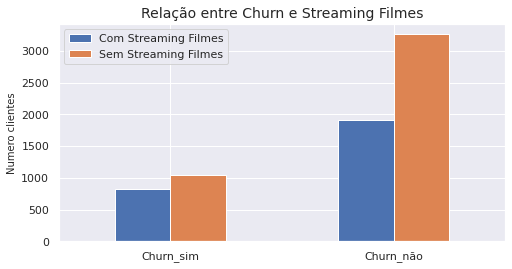

In [1418]:
churn_streaming_filmes.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Streaming Filmes", fontsize = 14)
plt.ylabel("Numero clientes")
plt.show()

Valores da categoria streaming_filmes(SIM/NÃO) em relação ao churn ,não é possivel observar uma tendencia maior de churn entre os clientes,valores similares, em numeros absolutos.

#### meses_contrato

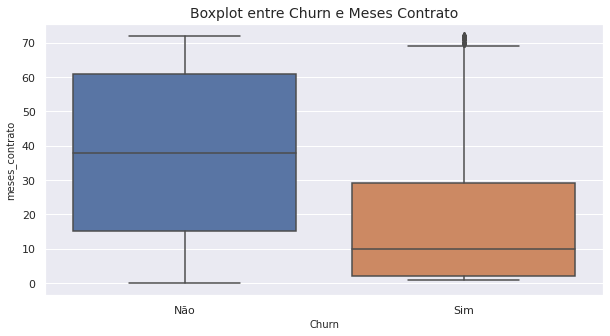

In [1419]:
sns.boxplot(x=df_grafico["Churn"],y=df_grafico["meses_contrato"])
plt.title( "Boxplot entre Churn e Meses Contrato", fontsize = 14)
plt.show()

In [1420]:
churn_meses_contrato = pd.DataFrame(columns = ["Menos 30", "Entre 30 - 60", "Mais 60"], index  = ["Churn_sim", "Churn_não"])

churn_meses_contrato["Menos 30"]= [df_grafico["ID_cliente"].loc[((df_grafico["meses_contrato"] <= 30) & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["meses_contrato"] <= 30) & (df_grafico["Churn"] == "Não"))].count()]

churn_meses_contrato["Entre 30 - 60"]=[df_grafico["ID_cliente"].loc[(( (df_grafico["meses_contrato"] > 30 ) & (df_grafico["meses_contrato"] <60)  ) & (df_grafico["Churn"] == "Sim"))].count(),
                                        df_grafico["ID_cliente"].loc[(( (df_grafico["meses_contrato"] > 30 ) & (df_grafico["meses_contrato"] <60)  ) & (df_grafico["Churn"] == "Não"))].count() ]

churn_meses_contrato["Mais 60"]=[df_grafico["ID_cliente"].loc[((df_grafico["meses_contrato"] >= 60) & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["meses_contrato"] >= 60) & (df_grafico["Churn"] == "Não"))].count() ]
churn_meses_contrato

,Menos 30,Entre 30 - 60,Mais 60
Churn_sim,1425,345,99
Churn_não,2216,1574,1384


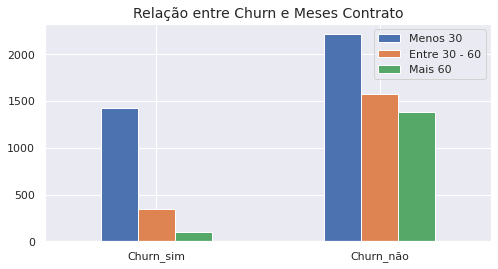

In [1421]:
churn_meses_contrato.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Meses Contrato", fontsize = 14)
plt.show()

Valores da categoria meses_contrato em relação ao churn ,observa-se uma tendencia maior de churn entre os clientes com poucos meses de contrato, em numeros absolutos.

#### gasto_diario

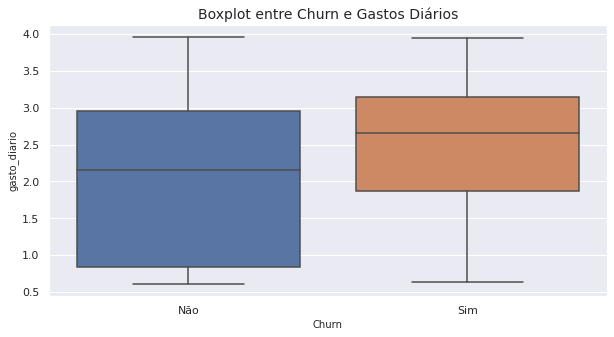

In [1422]:
sns.boxplot(x=df_grafico["Churn"],y=df_grafico["gasto_diario"])
plt.title( "Boxplot entre Churn e Gastos Diários", fontsize = 14)
plt.show()

Valores da categoria gasto_diario em relação ao churn ,é possivel observar uma tendencia maior de churn entre os clientes com valores diários maiores. Melhor observado no grafico com a relação mensal, considerando numeros absolutos.

#### gasto_mensal

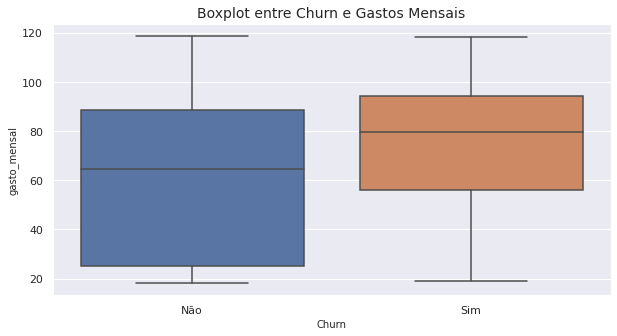

In [1423]:
sns.boxplot(x=df_grafico["Churn"],y=df_grafico["gasto_mensal"])
plt.title( "Boxplot entre Churn e Gastos Mensais", fontsize = 14)
plt.show()

Valores da categoria gasto_mensal em relação ao churn ,é possivel observar uma tendencia maior de churn entre os clientes que possuem um gasto mensal maior, em numeros absolutos.

#### gasto_total

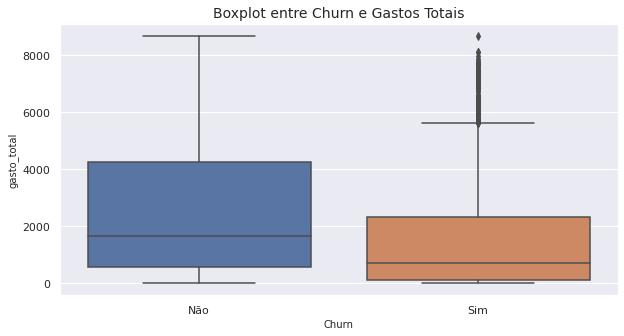

In [1424]:
sns.boxplot(x=df_grafico["Churn"],y=df_grafico["gasto_total"])
plt.title( "Boxplot entre Churn e Gastos Totais", fontsize = 14)
plt.show()

In [1425]:
churn_gasto_total = pd.DataFrame(columns = ["Com menos 3000", "Entre 3000 - 6000", "Com mais 6000"], index  = ["Churn_sim", "Churn_não"])

churn_gasto_total["Com menos 3000"]= [df_grafico["ID_cliente"].loc[((df_grafico["gasto_total"] <= 3000) & (df_grafico["Churn"] == "Sim"))].count(),
                            df_grafico["ID_cliente"].loc[((df_grafico["gasto_total"] <= 3000) & (df_grafico["Churn"] == "Não"))].count()]

churn_gasto_total["Entre 3000 - 6000"]=[df_grafico["ID_cliente"].loc[(( (df_grafico["gasto_total"] > 3000 ) & (df_grafico["gasto_total"] <6000)  ) & (df_grafico["Churn"] == "Sim"))].count(),
                                        df_grafico["ID_cliente"].loc[(( (df_grafico["gasto_total"] > 3000 ) & (df_grafico["gasto_total"] <6000)  ) & (df_grafico["Churn"] == "Não"))].count() ]

churn_gasto_total["Com mais 6000"]=[df_grafico["ID_cliente"].loc[((df_grafico["gasto_total"] >= 6000) & (df_grafico["Churn"] == "Sim"))].count(),
                          df_grafico["ID_cliente"].loc[((df_grafico["gasto_total"] >= 6000) & (df_grafico["Churn"] == "Não"))].count() ]
churn_gasto_total

,Com menos 3000,Entre 3000 - 6000,Com mais 6000
Churn_sim,1519,262,88
Churn_não,3320,1250,604


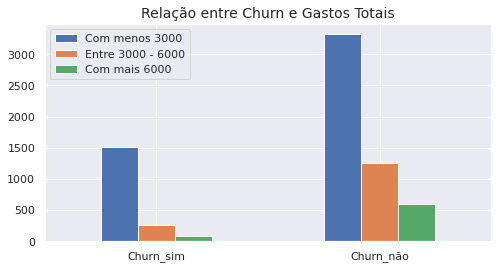

In [1426]:
churn_gasto_total.plot.bar(rot=0,figsize=(8, 4))
plt.title( "Relação entre Churn e Gastos Totais", fontsize = 14)
plt.show()

Valores da categoria gasto_total em relação ao churn ,é possivel observar uma tendencia maior de churn entre os clientes com gasto total menor, indicando provavelmente, pouco tempo de contrato, em numeros absolutos.

### <i>Analise da correlação da variavel churn </i>

In [1427]:
df = pd.read_csv("Telco-Customer-Churn.csv")

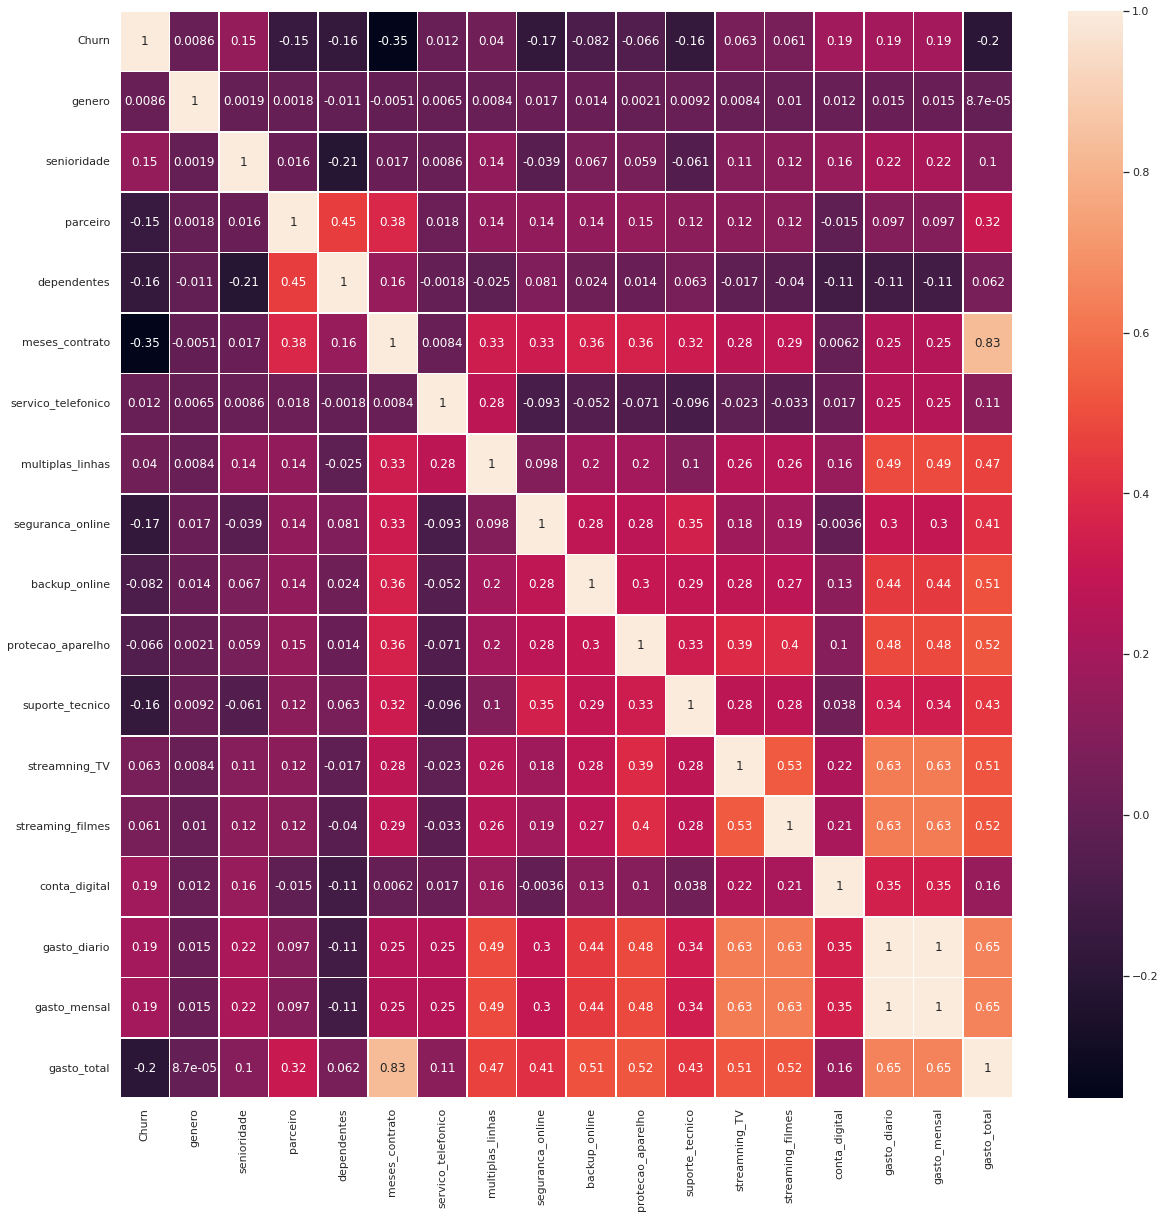

In [1428]:
correlacao = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(correlacao, annot=True, linewidths=0.5)
plt.show()

## <b>CARDS - SEMANA 2</b>

- Foi feita a Analise e visualização da variável target - churn, comparada com as outras variaveis, uma a uma, e foram criados gráficos para tentar indentificar relações.
     Os dados trabalhados foram dados absolutos.

- Foi feito gráfico para expressar a correlação entre as variáveis



## <b>SEMANA 3 -</b> 

## <b>CARDS  - SEMANA 3</b>